In [122]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading


display_handle=display(None, display_id=True)
cap = cv2.VideoCapture('./2.mp4')

image_list = []
for i in range(700):
    _, frame = cap.read()
    frame = frame[:,420:420+1080,:]
    frame = cv2.resize(frame, (512, 512), 
               interpolation = cv2.INTER_LINEAR)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_list.append(frame)
cap.release()

None

In [28]:
image_list[0].shape

(512, 512, 3)

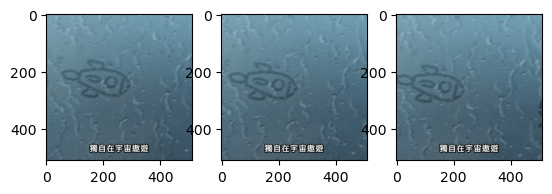

In [53]:
from matplotlib import pyplot as plt
f = plt.figure()
f.add_subplot(1, 3, 1)
plt.imshow(image_list[400])
f.add_subplot(1, 3, 2)
plt.imshow(image_list[401])
f.add_subplot(1, 3, 3)
plt.imshow(image_list[402])
plt.show(block=True)

In [13]:
from trt_utils import *

In [125]:
# convert('.','.','./export/rife_256', 'fp16')
rife = Processor(load_engine('./export/rife_x3/rife_384.trt'), 2)

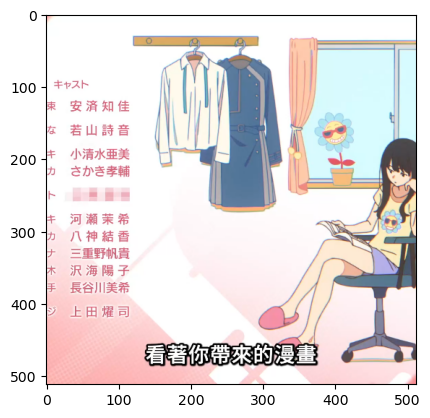

In [85]:
def imgShapeProce(img):
    return img.reshape((512*512, 3)).transpose().reshape(1,3,512,512).astype(np.float16)/255.0
def imgReverseProce(img):
    return (img * 255.0).reshape(3,512*512).transpose().reshape(512,512,3).astype(np.uint8)

plt.imshow(imgReverseProce(imgShapeProce(image_list[50])))
plt.show()

In [126]:
img_n = 420
inc = 3
mid1 = inc//3
mid2 = 2*inc//3
img1 = imgShapeProce(image_list[img_n])
img2 = imgShapeProce(image_list[img_n + inc])

f = plt.figure(figsize=(100,100))
f.add_subplot(2, 3, 1)
plt.imshow(image_list[img_n])
f.add_subplot(2, 3, 2)
plt.imshow(image_list[img_n + inc])

f.add_subplot(2, 3, 3)
plt.imshow(image_list[img_n + mid1])

f.add_subplot(2, 3, 4)
plt.imshow(image_list[img_n + mid2])

f.add_subplot(2, 3, 5)
plt.imshow(imgReverseProce(rife.inference([img1, img2])[0]))

f.add_subplot(2, 3, 6)
plt.imshow(imgReverseProce(rife.inference([img1, img2])[1]))

plt.show()